# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


## Reference MachineLearningMastery.com

In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from glob import glob
import sys, os
import cv2


In [4]:
!wget https://www.theluxecafe.com/wp-content/uploads/2014/07/ferrari-spider-indian-theluxecafe.jpg

--2020-06-03 10:11:55--  https://www.theluxecafe.com/wp-content/uploads/2014/07/ferrari-spider-indian-theluxecafe.jpg
Resolving www.theluxecafe.com (www.theluxecafe.com)... 103.50.163.41
Connecting to www.theluxecafe.com (www.theluxecafe.com)|103.50.163.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95114 (93K) [image/jpeg]
Saving to: ‘ferrari-spider-indian-theluxecafe.jpg’

ferrari-spider-indi 100%[===================>]  92.88K   161KB/s    in 0.6s    

2020-06-03 10:11:56 (161 KB/s) - ‘ferrari-spider-indian-theluxecafe.jpg’ saved [95114/95114]



In [5]:
!ls 

ferrari-spider-indian-theluxecafe.jpg  sample_data


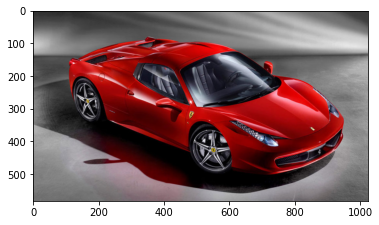

In [26]:
X = cv2.imread('ferrari-spider-indian-theluxecafe.jpg')
X = cv2.cvtColor(X, cv2.COLOR_BGR2RGB)
plt.imshow(X)

In [27]:
print(X.shape)

(582, 1024, 3)


In [0]:
IMAGE_SIZE = X.shape

In [0]:
X = np.expand_dims(X, axis=0)

In [30]:
print(X.shape)

(1, 582, 1024, 3)


In [33]:
y = np.ndarray([1])
print(y.shape)

(1,)


In [0]:
i_layer = Input(shape = IMAGE_SIZE)
h_layer = Conv2D(8, (3,3), strides = 1, activation='relu', padding='same')(i_layer)
h_layer = Flatten()(h_layer)
o_layer = Dense(1, activation='sigmoid')(h_layer)

model = Model(i_layer, o_layer)

In [70]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 582, 1024, 3)]    0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 582, 1024, 8)      224       
_________________________________________________________________
flatten_1 (Flatten)          (None, 4767744)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4767745   
Total params: 4,767,969
Trainable params: 4,767,969
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [72]:
report = model.fit(X, y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 39.2743 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.000

In [73]:
model.layers

In [74]:
conv_layer = model.layers[1]
print(conv_layer)

In [75]:
filters, biases = conv_layer.get_weights()
print(conv_layer.name, filters.shape)

conv2d_3 (3, 3, 3, 8)


In [0]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

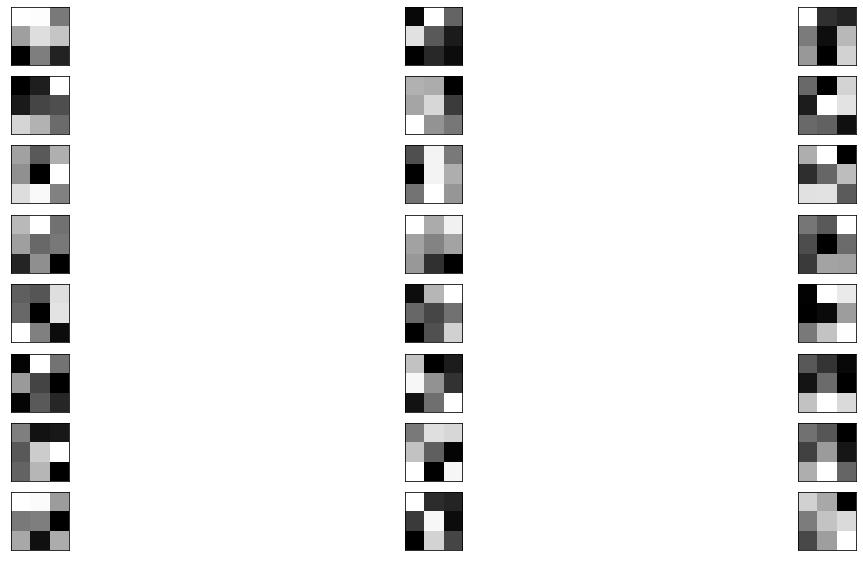

In [97]:
plt.figure(figsize=(20,10))
n_filters, idx = 8, 1
for i in range(n_filters):
	# get filter
	f = filters[:, :, :, i]
	for j in range(3):
		ax = plt.subplot(n_filters, 3, idx)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(f[:, :, j], cmap='gray')
		idx += 1
plt.show()

In [0]:
model_visual = Model(inputs=model.inputs, outputs=conv_layer.output)

In [79]:
model_visual.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 582, 1024, 3)]    0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 582, 1024, 8)      224       
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


In [83]:
maps = model_visual(X)
print(maps.shape)

(1, 582, 1024, 8)


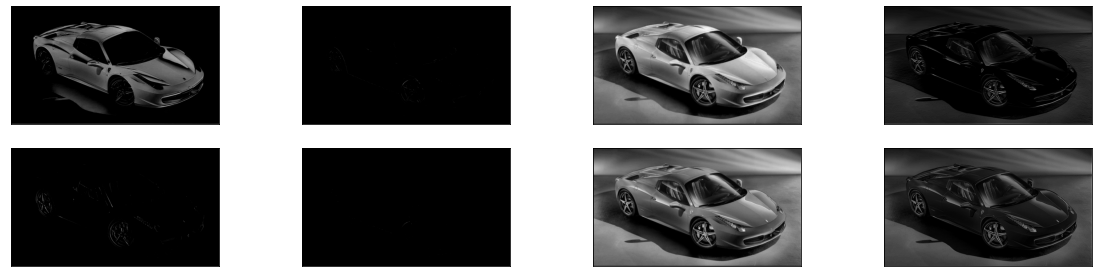

In [96]:
plt.figure(figsize=(20,10))
square = 4
idx = 1
for _ in range(square):
  for _ in range(square):
    if (idx > square * 2):
      break
    # specify subplot and turn of axis
    ax = plt.subplot(square, square, idx)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(maps[0, :, :, idx-1], cmap='gray')
    idx += 1

plt.show()

In [98]:
maps.shape[3]

8

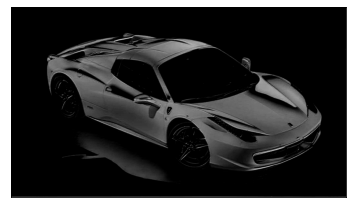

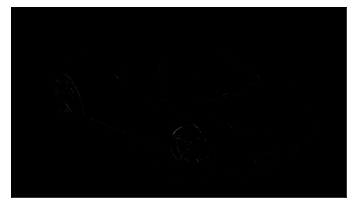

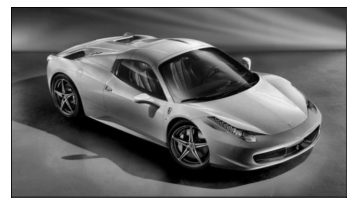

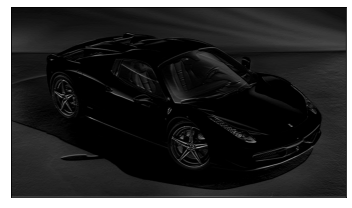

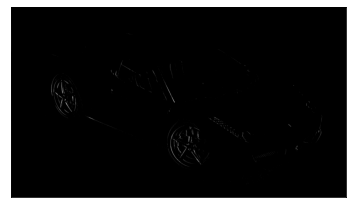

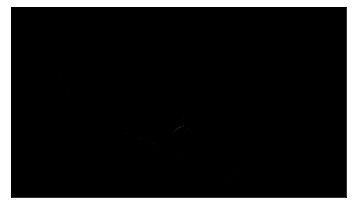

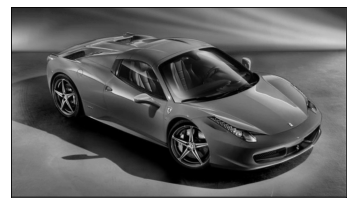

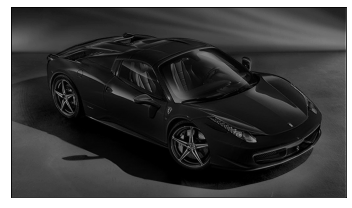

In [107]:
for i in range(maps.shape[3]):
  ax = plt.subplot()
  plt.imshow(maps[0, :, :, i], cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()